In [1]:
%matplotlib inline

import pathlib, sys, os

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator

mpl.style.use('base')

import numpy as np
import pandas as pd

from IPython import display

import pyfraecx as fraecx


C:\Users\mskocic\.pyfraecx\pyfraecx.ini


In [2]:
FORMATS = ['png']
DPI = 300

In [3]:
def Z_R(w, R):
    r"""
    Compute complex impedance of a resistor.
    
    Parameters
    -----------
    w: array-like, shape=(n,)
        Angular frequencies in s-1.
    R: float
        Resistance in Ohms.
    
    Returns
    -----------
    Z: array-like, shape=(n,)
        Complex impedance in Ohms.
    """
    return np.ones_like(w) * R

def Z_C(w, C):
    r"""
    Compute complex impedance of a capacitor.
    
    Parameters
    -----------
    w: array-like, shape=(n,)
        Angular frequencies in s-1.
    C: float
        Capacitance in F.
    
    Returns
    -----------
    Z: array-like, shape=(n,)
        Complex impedance in Ohms.
    """
    return 1/(1j*C*w)

def Z_L(w, L):
    r"""
    Compute complex impedance of a inductor.
    
    Parameters
    -----------
    w: array-like, shape=(n,)
        Angular frequencies in s-1.
    L: float
        Inductance in H.
    
    Returns
    -----------
    Z: array-like, shape=(n,)
        Complex impedance in Ohms.
    """
    return 1j*L*w

def Z_Q(w, Q, a):
    r"""
    Compute complex impedance of a Constant Phase Element.
    
    Parameters
    -----------
    w: array-like, shape=(n,)
        Angular frequencies in s-1.
    Q: float
        CPE amplitude in S.s^a.
    
    Returns
    -----------
    Z: array-like, shape=(n,)
        Complex impedance in Ohms.
    """
    return 1/(Q*(1j*w)**a)

def Z_W(w, sigma):
    r"""
    Compute complex impedance of a semi-infinite warburg.
    
    Parameters
    -----------
    w: array-like, shape=(n,)
        Angular frequencies in s-1.
    sigma: float
        Warburg angular resistance in Omhs.s^-1/2.
    
    Returns
    -----------
    Z: array-like, shape=(n,)
        Complex impedance in Ohms.
    """
    return sigma * (1-1j) / np.sqrt(w)
    
def Z_Wd(w, Rd, nd, Td):
    r"""
    Compute complex impedance of a finite-length warburg.
    
    Parameters
    -----------
    w: array-like, shape=(n,)
        Angular frequencies in s-1.
    Rd: float
        Warburg resistance resistance in Omhs.
    nd: float
        Warburg exponent. Usually 0.5.
    Td: float
        Warburg time constant in seconds.
    
    Returns
    -----------
    Z: array-like, shape=(n,)
        Complex impedance in Ohms.
    """
    return Rd * np.tanh((1j*Td*w)**nd) / (1j*Td*w)**nd
    
    
def Z_Wm(w, Rm, nm, Tm):
    r"""
    Compute complex impedance of a finite-space warburg.
    
    Parameters
    -----------
    w: array-like, shape=(n,)
        Angular frequencies in s-1.
    Rm: float
        Warburg resistance resistance in Omhs.
    nm: float
        Warburg exponent. Usually 0.5.
    Tm: float
        Warburg time constant in seconds.
    
    Returns
    -----------
    Z: array-like, shape=(n,)
        Complex impedance in Ohms.
    """
    return Rm * (1/np.tanh((1j*Tm*w)**nm)) / (1j*Tm*w)**nm

# Principle of EIS




## References

E. Barsoukov and J. R. Macdonald, Impedance Spectroscopy: Theory, Experiment, and Applications, 2nd ed. Hoboken, NJ, USA: John Wiley & Sons, Inc., 2005.

M. E. Orazem and B. Tribollet, Electrochemical Impedance Spectroscopy. John Wiley & Sons, Inc., 2008.

A. J. Bard and M. Stratmann, Fundamentals of Semiconductors Electrochemistry and Photoelectrochemistry. Wiley-VCH, 2002.

J.-P. Diard, B. Le Gorrec, and C. Montella, Cinétique électrochimique. Paris: Hermann, 1996.

C. H. Hsu and F. Mansfeld, “Technical Note: Concerning the Conversion of the Constant Phase Element Parameter Y0 into a Capacitance,” Corrosion, vol. 57, no. 9, pp. 747–748, Sep. 2001, doi: 10.5006/1.3280607.

B. Hirschorn, M. E. Orazem, B. Tribollet, V. Vivier, I. Frateur, and M. Musiani, “Determination of effective capacitance and film thickness from constant-phase-element parameters,” Electrochimica Acta, vol. 55, no. 21, pp. 6218–6227, Aug. 2010, doi: 10.1016/j.electacta.2009.10.065.

B. A. Boukamp, “Electrochemical Impedance Spectroscopy,” University of Twente, Netherlands, 2008.

C. Gabrielli and H. Takenouti, “Méthodes électrochimiques appliquées à la corrosion Techniques dynamiques,” Techniques de l’ingénieur Essais et expertise à la corrosion Techniques dynamiques, vol. TIB499DUO, no. cor811, 2015.

C. Gabrielli, F. Huet, H. Takenouti, and B. Tribollet, “Mesures d’impédance appliquées à l’électrochimie,” Université Sorbonne, Paris, FPZ1, 2011.

## Black Box Approach

* Assume a black box with two terminals.
* One applies a voltage and measures the current response (or visa versa). 
* Signal can be dc or periodic with frequency $𝑓$, or angular frequency $\omega=2\pi𝑓$ with: $0 \leq \omega \lt \infty$
  * Voltage: $V(\omega) = V_0 \cdot e^{j \omega t}$
  * Current: $I(\omega) = I_0 \cdot e^{j (\omega t - \phi)}$


In [4]:
def formatter_pi(x, pos):
    
    x = x * 2 * 2 # x is number of periods which correspond to 2pi and we want subidivision in pi/2 so multiply again by2
    
    q = x // 2
    r = x % 2 
    
    if x  == 0:
        return "0"
    
    if r > 0:
        if x <= 1:
            return r"$\frac{\pi}{2}$"
        else:
            return r"{0:.0f}".format(x) + r"$\frac{\pi}{2}$"
    else:
        return r"{0:.0f}".format(q) + r"$\pi$"
    

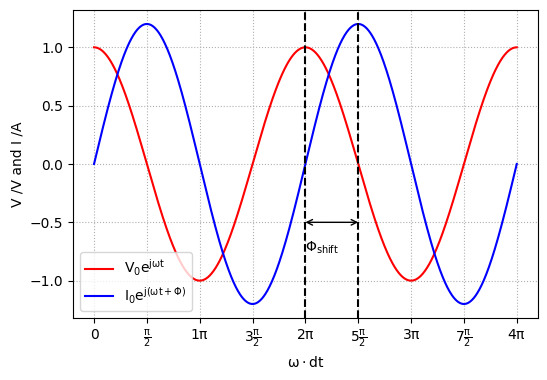

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel(r"$\omega \cdot dt$")
ax.set_ylabel('V /V and I /A')

f = 1.0
T = 1 / f
n = np.linspace(0, 2, 1000)
x = n * T
phi = -np.pi/2

w = 2*np.pi*f
V = np.cos(w*x)
I = 1.2*np.cos(w*x + phi)

ax.plot(n, V, 'r-', label=r"$V_0 e^{j\omega t}$")
ax.plot(n, I, 'b-', label=r"$I_0 e^{j(\omega t+\Phi)}$")


ax.axvline(x=1, color='k', ls='--', marker='')
ax.axvline(x=1 + 1/4, color='k', ls='--', marker='')
ax.text(x=1, y= -0.75, s=r'$\Phi _{shift}$')
ax.annotate(text="", xy=(1, -0.5), xytext=(1.25, -0.5),
           arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))


ax.xaxis.set_major_formatter(formatter_pi)

ax.legend(loc='lower left')

name = 'EIS_Principle-AC_waves'
for i in FORMATS:
    fig.savefig('../Outputs/Plots/' + i + '/' + name + '.' + i, dpi=DPI, format=i)

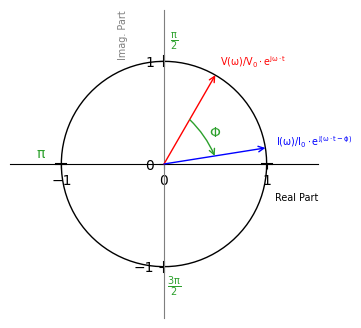

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal")
ax.grid(False)
#ax.set_axis_off()

ax.spines["left"].set_position('center')
ax.spines["left"].set_color("C7")

ax.spines["right"].set_color('none')

ax.spines["bottom"].set_position('center')
ax.spines["bottom"].set_color("k")

ax.spines["top"].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.set_xlabel("Real Part", loc="right", color='k', fontsize="x-small")
ax.set_ylabel("Imag. Part", loc="top", color="C7", fontsize="x-small")

# trigonometric circle and center and positions of +/- pi/4
r = 1.0
phase = np.linspace(0, 2*np.pi, 100)
circle = r*np.exp(1j*phase)
x = circle.real
y = circle.imag
ax.plot(x, y, "k-", lw=1)


dr = 0.05
rs = np.linspace(r*(1-dr), r*(1+dr), 10)
angles = (0, np.pi/2, np.pi, 3*np.pi/2)
labels = ("", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$")
d = 0.1
dxdys = ((0,0), (d, 0), (0, d), (d,0))
for angle, label, dxdy in zip(angles, labels, dxdys):
    
    # ticks in circle
    z = rs * np.exp(1j*angle)
    x, y = z.real, z.imag
    ax.plot(x, y, "k-")
    
    # text over ticks
    z = r*(1+dr*4) * np.exp(1j*angle)
    x, y = z.real, z.imag
    dx, dy = dxdy
    ax.text(s=label, x=x+dx, y=y+dy, va="center", ha="center", color="C2")

# plot voltage and current and annotate their vectors
V0 = 1.9
phi_V = np.pi/3
V = V0*np.exp(1j*phi_V)
x = V.real / V0
y = V.imag / V0
arrowprops = dict(arrowstyle="->", shrinkA=0, shrinkB=0, color="r")
ax.annotate(text="", xy=(x, y), xytext=(0,0), arrowprops=arrowprops)
ax.text(s=r"$V(\omega)/V_0 \cdot e^{j\omega \cdot t}$", x=x*1.1, y=y*1.1, fontsize="x-small", color="r")

I0 = 0.7
phi_I = np.pi/20
I = I0*np.exp(1j*phi_I)
x = I.real / I0
y = I.imag / I0
arrowprops = dict(arrowstyle="->", shrinkA=0, shrinkB=0, color="b")
ax.annotate(text="", xy=(x, y), xytext=(0,0), arrowprops=arrowprops)
ax.text(s=r"$I(\omega)/I_0 \cdot e^{j(\omega \cdot t - \phi)}$", x=x*1.1, y=y*1.1, fontsize="x-small", color="b")


# annotate phase shift
arrowprops = dict(arrowstyle="->", shrinkA=0, shrinkB=0, color="C2", connectionstyle="arc3, rad=-0.1")
xy = np.real(I/I0)/2, np.imag(I/I0)/2
xytext = np.real(V/V0)/2, np.imag(V/V0)/2
ax.annotate(text="", xytext=xytext, xy=xy, arrowprops=arrowprops)
z = np.exp(1j*(phi_V+phi_I)/2) / 1.9
x, y = z.real, z.imag
ax.text(s=r"$\Phi$", x=x, y=y, va="center", ha="left", color="C2")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

name = 'EIS_Principle-AC_waves-TrigCircle'
for i in FORMATS:
    fig.savefig('../Outputs/Plots/' + i + '/' + name + '.' + i, dpi=DPI, format=i)

## What is EIS?

The impedance is determined from the imposed voltage/current and the measured current/voltage through the Ohm's law:
$$Z(\omega) = \frac{V(\omega)}{I(\omega)} = \frac{V_0}{I_0} e^{j\phi} = Z_0 e^{j\phi}$$

Therefore:
* Resistive behavior: $ReZ = Z_0 \cdot \cos \phi$
* Capacitive/Inductive behavior $ImZ = Z_0 \cdot \sin \phi$

Sometimes, the complex admittance can also be used which is defined as the inverse of the complex impedance 
$$𝑌(\omega)=1/𝑍(\omega)$$ 

## Representation

The impedance $Z(\omega)$ can be represented in two different ways: 
 1. **Bode plot**: shows the phase shift and magnitude changes in the applied frequency ranges
 2. **Nyquist plot**: represents the real and imaginary parts of $Z(\omega)$ using cartesian coordinates. 
 
The Bode plot has great advantages for observing phase margins in which the system becomes unstable (violent
phase or magnitude changes). Therefore, it is useful for the study of sensors, filters, and transistors in
electronic devices. 

The Nyquist plot provides insight into the possible mechanism or governing phenomena
in an equivalent circuit model system. Among these two types of representations, the Nyquist plot is
more often used to analyze the characteristics of electrochemical processes.

In [7]:
f = np.logspace(5, -2, 100)
w = 2*np.pi*f

Rel = 10.0

R = 100
Zr = np.ones_like(w) * R

C = 1e-5
Zc = 1/(1j*C*w)

Z = Rel +  Zr*Zc / (Zr+Zc)
ReZ = Z.real
ImZ = Z.imag
modZ = np.absolute(Z)
phase = np.angle(Z, deg=True)

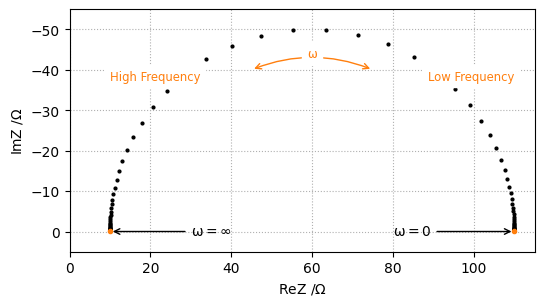

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal")
ax.set_xlabel(r"ReZ /$\Omega$")
ax.set_ylabel(r"ImZ /$\Omega$")


ax.plot(ReZ, ImZ, "k.", ms=4)
ax.plot(ReZ[0], ImZ[0], "C1", ms=6)
ax.plot(ReZ[-1], ImZ[-1], "C1", ms=6)


ax.text(s="High Frequency", x=0+Rel, y=-40, va="top", ha="left", backgroundcolor="w", color="C1", fontsize="small")
ax.text(s="Low Frequency", x=100+Rel, y=-40, va="top", ha="right", backgroundcolor="w", color="C1", fontsize="small")
ax.annotate(text="", xy=(35+Rel, -40), xytext=(65+Rel, -40), 
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3, rad=0.2", color="C1"))
ax.text(s=r"$\omega$", x=50+Rel, y=-44, va="center", ha="center", backgroundcolor="w", color="C1", fontsize="small")

ax.annotate(text=r"$\omega=\infty$", xy=(0+Rel, 0), xytext=(30+Rel, 0), va="center", ha="right", 
            arrowprops=dict(arrowstyle="->"))

ax.annotate(text=r"$\omega=0$", xy=(100+Rel, 0), xytext=(70+Rel, 0), va="center", ha="left",
            arrowprops=dict(arrowstyle="->"))

ax.set_xlim(0,)
ax.set_ylim(-55, 5)

ax.invert_yaxis()

name = 'EIS_Principle-Representation_Nyquist'
for i in FORMATS:
    fig.savefig('../Outputs/Plots/' + i + '/' + name + '.' + i, dpi=DPI, format=i)

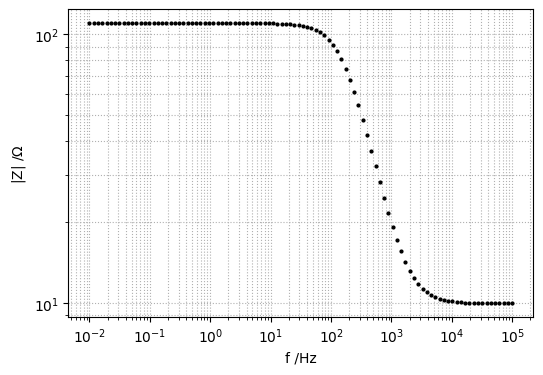

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("f /Hz")
ax.set_ylabel(r"|Z| /$\Omega$")

ax.loglog(f, modZ, "k.", ms=4)
ax.grid(True, "both")

name = 'EIS_Principle-Representation_Bode_Mod'
for i in FORMATS:
    fig.savefig('../Outputs/Plots/' + i + '/' + name + '.' + i, dpi=DPI, format=i)

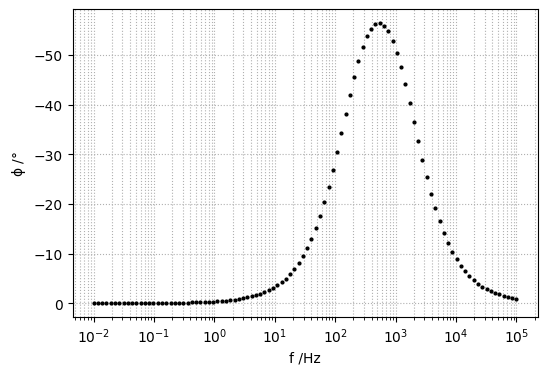

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel(r"f /Hz")
ax.set_ylabel(r"$\phi$ /°")

ax.plot(f, phase, "k.", ms=4)

ax.set_xscale("log")
ax.grid(True, "both", "x")

ax.invert_yaxis()

name = 'EIS_Principle-Representation_Bode_Phase'
for i in FORMATS:
    fig.savefig('../Outputs/Plots/' + i + '/' + name + '.' + i, dpi=DPI, format=i)

## Series and Parallel Connections 

* Series connection: $Z_1 - Z_2 - \ldots - Z_n$ --> $Z_{eq} = \sum Z_i$
* Parallel connection: $Z_1/Z_2/\ldots/Z_n$ --> $Z_eq = \left( \sum \frac{1}{Z_i} \right)^{-1}$

# Equivalent Circuit Models

* The circuit model for EIS consists of a combination of electrical circuit elements: 
  * ideal elements: resistors (R), capacitors (C) and inductors (L)
  * nonideal capacitor-like element: Constant Phase Element (CPE or $Q$)
  * diffusion elements: semi-infinite Warburg ($W$), Finite Length Warburg ($W_{\delta}$ or $O$) and Finite Space Warburg ($W_{m}$ or $T$)

* The circuit model represents the entire system of the electrochemical cell and therefore the aim is to construct an optimal circuit model that is physically meaningful and minimizes the number of variables.


## Circuit Elements

* $R$ (Resistor): $Z(\omega) = R$
* $C$ (Capacitor): $Z(\omega) = \frac{1}{jC\omega}$
* $L$ (Inductor): $Z(\omega) = jL\omega$
* $W$ (Semi-inifnite Warburg): $Z(\omega) = \frac{\sigma}{\sqrt{\omega}} \cdot (1-j)$
* $W_{\delta}$ (Finite Length Warburg): $Z(\omega) = \frac{R_{\delta} \cdot \tanh \left( \sqrt{j\omega\tau}\right)}{\sqrt{j\omega\tau}}$
* $W_{m}$ (Finite Space Warburg): $Z(\omega) = \frac{R_m \cdot \coth \left( \sqrt{j\omega\tau}\right)}{\sqrt{j\omega\tau}}$
* Inductor and Finite Space Warburg are rarely encountered in corrosion studies.

C:\Users\mskocic\.local\msys64\tmp\ipykernel_20216\1730388008.py:111: RuntimeWarning: overflow encountered in tanh
  return Rd * np.tanh((1j*Td*w)**nd) / (1j*Td*w)**nd
C:\Users\mskocic\.local\msys64\tmp\ipykernel_20216\1730388008.py:134: RuntimeWarning: overflow encountered in tanh
  return Rm * (1/np.tanh((1j*Tm*w)**nm)) / (1j*Tm*w)**nm


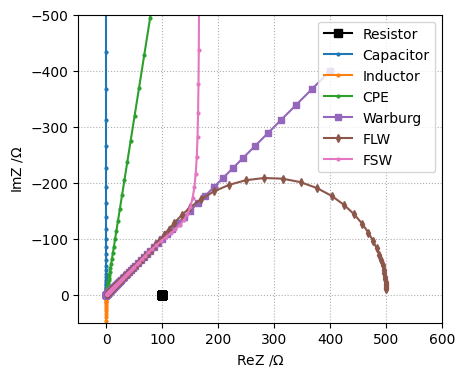

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal")

ax.set_xlabel(r"ReZ /$\Omega$")
ax.set_ylabel(r"ImZ /$\Omega$")

f = np.logspace(5, -2, 100)
w = np.pi*f*2

color = "k"
z = Z_R(w, R=100.0)
x = z.real
y = z.imag
ax.plot(x, y, color=color, marker="s", ms=6, label="Resistor")


color = "C0"
z = Z_C(w, C=1e-2)
x = z.real
y = z.imag
ax.plot(x, y, color=color, marker=".", ms=4, label="Capacitor")

color = "C1"
z = Z_L(w, L=1e-2)
x = z.real
y = z.imag
ax.plot(x, y, color=color, marker=".", ms=4, label="Inductor")


color = "C2"
z = Z_Q(w, Q=1e-2, a=0.9)
x = z.real
y = z.imag
ax.plot(x, y, color=color, marker=".", ms=4, label="CPE")


color = "C4"
z = Z_W(w, sigma=100.0)
x = z.real
y = z.imag
ax.plot(x, y, color=color, marker="s", ms=4, label="Warburg")

color = "C5"
z = Z_Wd(w, Rd=500.0, nd=0.5, Td=1.0)
x = z.real
y = z.imag
ax.plot(x, y, color=color, marker="d", ms=4, label="FLW")

color = "C6"
z = Z_Wm(w, Rm=500.0, nm=0.5, Tm=1.0)
x = z.real
y = z.imag
ax.plot(x, y, color=color, marker=".", ms=4, label="FSW")


ax.set_xlim(-50, 600)
ax.set_ylim(-500, 50)

ax.invert_yaxis()

ax.legend(ncol=1)

name = 'EIS_Principle-CircuitElements'
for i in FORMATS:
    fig.savefig('../Outputs/Plots/' + i + '/' + name + '.' + i, dpi=DPI, format=i)

## Link between circuit elements and physical parameters

* Resistors can be linked to resistivity or kinetics:
  * $R = \frac{\rho \cdot d}{A}$
  * $R = \frac{RT}{F A j_0 (\alpha_a + \alpha_c)} = \frac{RT}{A F^2 k^0 K_c (\alpha_a + \alpha_c)}$
* Capacitors can be linked to layer thickness 
  * $C = \frac{\epsilon \epsilon_0 A}{d}$
* FS/FL Warburg element can be linked to diffusion coefficient and layer thickness:
  * $R = \frac{RT}{AF^2 \sqrt{2}} \cdot \frac{d}{D\cdot C^*}$
  * $\tau = \frac{d^2}{D}$
  * $\sigma = \frac{R}{\sqrt{2\tau}}$
  
  
$R$: resistance \[$\Omega$\]

$\rho$: resistivity \[$\Omega \cdot m$\]

$d$: thickness \[$m$\]

$A$: Area \[$m^2$\]

$j_0$: exchange current density \[$A \cdot m^{-2}$\]

$k^0$: kinetics constant \[$m \cdot s^{-1}$\]

$K_c$: concentration factor \[$mol \cdot m^{-3}$\]

$\alpha_a$: anodic transfer coefficient

$\alpha_c$: cathodic transfer coefficient

$C^*$: bulk concentration of the diffusing species \[$mol.m^{-3}$\]



## Simplified Randles Circuit

* Reflects electrochemical reaction controlled only by kinetics
* $R_{el} + R_{ct} / C_{dl}$
* $𝑅_{𝑒𝑙}$: electrolyte resistance
* $𝑅_{𝑐𝑡}$: charge transfer resistance
* $𝐶_{𝑑𝑙}$: double layer capacitance


In [12]:
f = np.logspace(5, -2, 91)
w = 2*np.pi*f

Rel = 20.0

R = 100
Zr = np.ones_like(w) * R

C = 1e-5
Zc = 1/(1j*C*w)

Z = Rel +  Zr*Zc / (Zr+Zc)
ReZ = Z.real
ImZ = Z.imag
modZ = np.absolute(Z)
phase = np.angle(Z, deg=True)

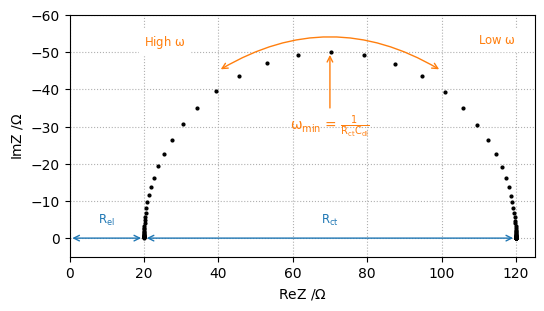

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal")
ax.set_xlabel(r"ReZ /$\Omega$")
ax.set_ylabel(r"ImZ /$\Omega$")


ax.plot(ReZ, ImZ, "k.", ms=4)



ax.text(s=r"High $\omega$", x=0+Rel, y=-55, va="top", ha="left", backgroundcolor="w", color="C1", fontsize="small")
ax.text(s=r"Low $\omega$", x=100+Rel, y=-55, va="top", ha="right", backgroundcolor="w", color="C1", fontsize="small")
ax.annotate(text="", xy=(20+Rel, -45), xytext=(80+Rel, -45), 
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3, rad=0.3", color="C1"))

ax.annotate(text="", xy=(0, 0), xytext=(Rel, 0), arrowprops=dict(arrowstyle="<->", color="C0"))
ax.text(s="$R_{el}$", x=Rel/2, y=-5, va="center", ha="center", backgroundcolor="w", color="C0", fontsize="small")

ax.annotate(text="", xy=(Rel, 0), xytext=(Rel+R, 0), arrowprops=dict(arrowstyle="<->", color="C0"))
ax.text(s="$R_{ct}$", x=Rel+R/2, y=-5, va="center", ha="center", backgroundcolor="w", color="C0", fontsize="small")

ax.annotate(text=r"$\omega _{min}$ = $\frac{1}{R_{ct}C_{dl}}$", 
            xy=(Rel+R/2, -50), color="C1",
            xytext=(Rel+R/2, -30), va="center", ha="center",
            arrowprops=dict(arrowstyle="->", color="C1"))


ax.set_xlim(0,)
ax.set_ylim(-60, 5)

ax.invert_yaxis()

name = 'EIS_Principle-SimplifiedRandles'
for i in FORMATS:
    fig.savefig('../Outputs/Plots/' + i + '/' + name + '.' + i, dpi=DPI, format=i)

## Randles Circuit

* Reflects electrochemical reaction controlled by kinetics and diffusion
* $R_{el} + R_{ct} / C_{dl}$
* $𝑅_{𝑒𝑙}$: electrolyte resistance
* $𝑅_{𝑐𝑡}$: charge transfer resistance
* $𝐶_{𝑑𝑙}$: double layer capacitance
* $W$: semi-infinite diffusion

In [14]:
Zw = Z_W(w, sigma=15.0)

Z = Rel +  (Zr+Zw)*Zc / (Zr+Zw+Zc)
ReZ = Z.real
ImZ = Z.imag
modZ = np.absolute(Z)
phase = np.angle(Z, deg=True)

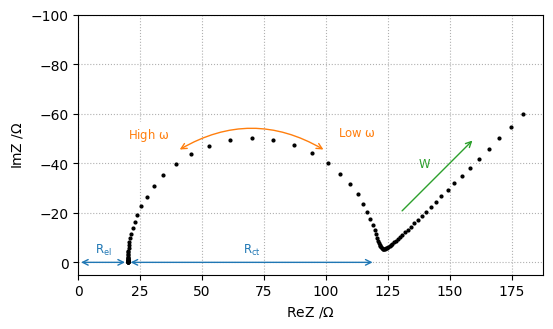

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal")
ax.set_xlabel(r"ReZ /$\Omega$")
ax.set_ylabel(r"ImZ /$\Omega$")


ax.plot(ReZ, ImZ, "k.", ms=4)



ax.text(s=r"High $\omega$", x=0+Rel, y=-55, va="top", ha="left", backgroundcolor="w", color="C1", fontsize="small")
ax.text(s=r"Low $\omega$", x=100+Rel, y=-55, va="top", ha="right", backgroundcolor="w", color="C1", fontsize="small")
ax.annotate(text="", xy=(20+Rel, -45), xytext=(80+Rel, -45), 
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3, rad=0.3", color="C1"))

ax.annotate(text="", xy=(0, 0), xytext=(Rel, 0), arrowprops=dict(arrowstyle="<->", color="C0"))
ax.text(s="$R_{el}$", x=Rel/2, y=-5, va="center", ha="center", color="C0", fontsize="small")

ax.annotate(text="", xy=(Rel, 0), xytext=(Rel+R, 0), arrowprops=dict(arrowstyle="<->", color="C0"))
ax.text(s="$R_{ct}$", x=Rel+R/2, y=-5, va="center", ha="center", color="C0", fontsize="small")


ax.annotate(text=r"", xy=(Rel+R+40, -50), xytext=(Rel+R+10, -20), color="C2",
            arrowprops=dict(arrowstyle="->", color="C2"))
ax.text(s="$W$", x=Rel+R+20, y=-40, va="center", ha="center", color="C2", fontsize="small")



ax.set_xlim(0,)
ax.set_ylim(-100, 5)

ax.invert_yaxis()

name = 'EIS_Principle-Randles'
for i in FORMATS:
    fig.savefig('../Outputs/Plots/' + i + '/' + name + '.' + i, dpi=DPI, format=i)